In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Data_latest_quater=pd.read_excel("RFM_Model.xlsx",'2022-q3')
Data_previous_quater=pd.read_excel("RFM_Model.xlsx",'2022-q2')

In [3]:
Data_latest_quater.head()

,MEMBER_NO,CAL_YEAR,CAL_QUARTER,RECENCY,FREQUENCY,MONETARY,QUATER_END_DATE,CUSTOMER_ID
0,360518,2022,4,53,2,208.5418,44926,360518
1,2297,2022,4,33,1,66.7500,44926,2297
2,38050,2022,4,4,7,1937.2250,44926,38050
3,10530,2022,4,13,16,968.4807,44926,10530
4,15545,2022,4,16,10,1741.5643,44926,15545


In [4]:
Data_previous_quater.head()

,MEMBER_NO,CAL_YEAR,CAL_QUARTER,RECENCY,FREQUENCY,MONETARY,QUATER_END_DATE,CUSTOMER_ID
0,292742,2022,3,51,2,309.7050,44834,292742
1,166170,2022,3,5,6,2145.8506,44834,166170
2,143529,2022,3,90,1,1746.2500,44834,143529
3,48373,2022,3,88,1,969.0000,44834,48373
4,196075,2022,3,87,1,1169.1500,44834,196075


In [5]:
Data_latest_quater = pd.DataFrame(Data_latest_quater,columns=['CUSTOMER_ID','RECENCY','FREQUENCY','MONETARY'])


In [6]:
Data_latest_quater = Data_latest_quater.rename(columns={'RECENCY': 'RECENCY_LST_QTR', 'FREQUENCY': 'FREQUENCY_LST_QTR','MONETARY': 'MONETARY_LST_QTR'})

In [7]:
Data_previous_quater = pd.DataFrame(Data_previous_quater,columns=['CUSTOMER_ID','RECENCY','FREQUENCY','MONETARY'])

In [8]:
Data_previous_quater = Data_previous_quater.rename(columns={'RECENCY': 'RECENCY_PRV_QTR', 'FREQUENCY': 'FREQUENCY_PRV_QTR','MONETARY': 'MONETARY_PRV_QTR'})

In [9]:
#pip install matplotlib

In [10]:
Data_latest_quater['R_rank'] = Data_latest_quater['RECENCY_LST_QTR'].rank(ascending=False)
Data_latest_quater['F_rank'] = Data_latest_quater['FREQUENCY_LST_QTR'].rank(ascending=True)
Data_latest_quater['M_rank'] = Data_latest_quater['MONETARY_LST_QTR'].rank(ascending=True)

#print(RFM1['R_rank'])
 
# normalizing the rank of the customers
Data_latest_quater['R_rank_norm'] = (Data_latest_quater['R_rank']/Data_latest_quater['R_rank'].max())*100
Data_latest_quater['F_rank_norm'] = (Data_latest_quater['F_rank']/Data_latest_quater['F_rank'].max())*100
Data_latest_quater['M_rank_norm'] = (Data_latest_quater['F_rank']/Data_latest_quater['M_rank'].max())*100
 
#print("MAX_R_AMOUNT",RFM1['R_rank'].max())
#print("MAX_F_AMOUNT",RFM1['F_rank'].max())    
#print("MAX_M_AMOUNT",RFM1['M_rank'].max())

Data_latest_quater.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
Data_latest_quater.head()

,CUSTOMER_ID,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR,R_rank_norm,F_rank_norm,M_rank_norm
0,360518,53,2,208.5418,28.541908,66.694073,66.694073
1,2297,33,1,66.7500,49.405902,28.840596,28.840596
2,38050,4,7,1937.2250,91.687037,95.112988,95.112988
3,10530,13,16,968.4807,76.289628,99.291178,99.291178
4,15545,16,10,1741.5643,71.538103,97.756434,97.756434


In [11]:
Data_previous_quater['R_rank'] = Data_previous_quater['RECENCY_PRV_QTR'].rank(ascending=False)
Data_previous_quater['F_rank'] = Data_previous_quater['FREQUENCY_PRV_QTR'].rank(ascending=True)
Data_previous_quater['M_rank'] = Data_previous_quater['MONETARY_PRV_QTR'].rank(ascending=True)
 
# normalizing the rank of the customers
Data_previous_quater['R_rank_norm'] = (Data_previous_quater['R_rank']/Data_previous_quater['R_rank'].max())*100
Data_previous_quater['F_rank_norm'] = (Data_previous_quater['F_rank']/Data_previous_quater['F_rank'].max())*100
Data_previous_quater['M_rank_norm'] = (Data_previous_quater['F_rank']/Data_previous_quater['M_rank'].max())*100
 
Data_previous_quater.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)
 
Data_previous_quater.head()

,CUSTOMER_ID,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR,R_rank_norm,F_rank_norm,M_rank_norm
0,292742,51,2,309.7050,29.860158,67.153695,67.153695
1,166170,5,6,2145.8506,89.525582,93.756455,93.756455
2,143529,90,1,1746.2500,0.926478,28.987369,28.987369
3,48373,88,1,969.0000,2.263310,28.987369,28.987369
4,196075,87,1,1169.1500,2.928713,28.987369,28.987369


In [12]:
Data_latest_quater['RFM_Score1'] = 0.15*Data_latest_quater['R_rank_norm']+0.28 * \
    Data_latest_quater['F_rank_norm']+0.57*Data_latest_quater['M_rank_norm']
Data_latest_quater['RFM_Score1'] *= 0.05
Data_latest_quater = Data_latest_quater.round(2)
Data_latest_quater[['CUSTOMER_ID', 'RFM_Score1','RECENCY_LST_QTR','FREQUENCY_LST_QTR','MONETARY_LST_QTR']].head(7)

,CUSTOMER_ID,RFM_Score1,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR
0,360518,3.05,53,2,208.54
1,2297,1.60,33,1,66.75
2,38050,4.73,4,7,1937.22
3,10530,4.79,13,16,968.48
4,15545,4.69,16,10,1741.56
5,5075,3.94,16,3,576.40
6,107634,4.29,11,4,429.36


In [13]:
Data_previous_quater['RFM_Score2'] = 0.15*Data_previous_quater['R_rank_norm']+0.28 * \
Data_previous_quater['F_rank_norm']+0.57*Data_previous_quater['M_rank_norm']
Data_previous_quater['RFM_Score2'] *= 0.05
Data_previous_quater = Data_previous_quater.round(2)
Data_previous_quater[['CUSTOMER_ID', 'RFM_Score2','RECENCY_PRV_QTR','FREQUENCY_PRV_QTR','MONETARY_PRV_QTR']].head(7)

,CUSTOMER_ID,RFM_Score2,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR
0,292742,3.08,51,2,309.70
1,166170,4.66,5,6,2145.85
2,143529,1.24,90,1,1746.25
3,48373,1.25,88,1,969.00
4,196075,1.25,87,1,1169.15
5,11042,4.59,28,11,2460.62
6,38946,3.43,12,2,792.00


In [14]:
Data_latest_quater["Customer_segment"] = np.where(Data_latest_quater['RFM_Score1'] >
                                      4.5, "Top",
                                      (np.where(
                                        Data_latest_quater['RFM_Score1'] > 4,
                                        "High",
                                        (np.where(
    Data_latest_quater['RFM_Score1'] > 3,
                             "Medium",
                             np.where(Data_latest_quater['RFM_Score1'] > 1.6,
                            'Low', 'Low_Loyality'))))))
Data_latest_quater[['CUSTOMER_ID', 'RFM_Score1', 'Customer_segment','RECENCY_LST_QTR','FREQUENCY_LST_QTR','MONETARY_LST_QTR']].head(20)

,CUSTOMER_ID,RFM_Score1,Customer_segment,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR
0,360518,3.05,Medium,53,2,208.54
1,2297,1.60,Low_Loyality,33,1,66.75
2,38050,4.73,Top,4,7,1937.22
3,10530,4.79,Top,13,16,968.48
4,15545,4.69,Top,16,10,1741.56
5,5075,3.94,Medium,16,3,576.40
6,107634,4.29,High,11,4,429.36
7,42498,4.72,Top,5,7,315.08
8,39496,4.30,High,10,4,681.73
9,193129,4.61,Top,0,5,194.11


In [15]:
Data_previous_quater["Customer_segment"] = np.where(Data_previous_quater['RFM_Score2'] >
                                      4.5, "Top",
                                      (np.where(
                                        Data_previous_quater['RFM_Score2'] > 4,
                                        "High",
                                        (np.where(
    Data_previous_quater['RFM_Score2'] > 3,
                             "Medium",
                             np.where(Data_previous_quater['RFM_Score2'] > 1.6,
                            'Low', 'Low_Loyality'))))))
Data_previous_quater[['CUSTOMER_ID', 'RFM_Score2', 'Customer_segment','RECENCY_PRV_QTR','FREQUENCY_PRV_QTR','MONETARY_PRV_QTR']].head(20)

,CUSTOMER_ID,RFM_Score2,Customer_segment,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR
0,292742,3.08,Medium,51,2,309.70
1,166170,4.66,Top,5,6,2145.85
2,143529,1.24,Low_Loyality,90,1,1746.25
3,48373,1.25,Low_Loyality,88,1,969.00
4,196075,1.25,Low_Loyality,87,1,1169.15
5,11042,4.59,Top,28,11,2460.62
6,38946,3.43,Medium,12,2,792.00
7,126216,1.27,Low_Loyality,84,1,97.46
8,46493,3.91,Medium,20,3,1465.40
9,342997,1.56,Low_Loyality,38,1,1364.00


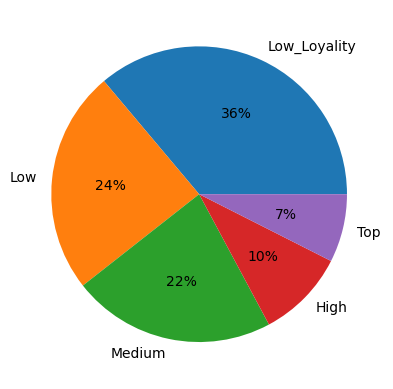

In [16]:
plt.pie(Data_latest_quater.Customer_segment.value_counts(),
        labels=Data_latest_quater.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

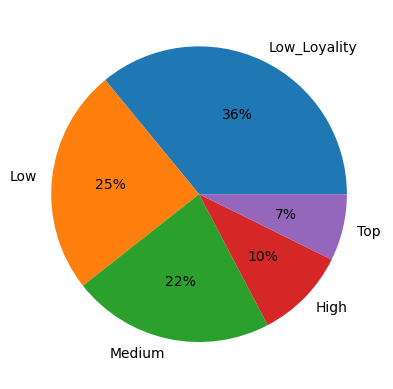

In [17]:
plt.pie(Data_previous_quater.Customer_segment.value_counts(),
        labels=Data_previous_quater.Customer_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

In [18]:
#RFM[['CUSTOMER_ID', 'RFM_Score', 'Customer_segment']]
data_latest_quater = Data_latest_quater[['CUSTOMER_ID', 'RFM_Score1', 'Customer_segment','RECENCY_LST_QTR','FREQUENCY_LST_QTR','MONETARY_LST_QTR']]
#data1.to_excel('sample_data.xlsx', sheet_name='2022-q3', index=False)

In [19]:
#RFM[['CUSTOMER_ID', 'RFM_Score', 'Customer_segment']]
data_previous_quater = Data_previous_quater[['CUSTOMER_ID', 'RFM_Score2', 'Customer_segment','RECENCY_PRV_QTR','FREQUENCY_PRV_QTR','MONETARY_PRV_QTR']]
#data2.to_excel('sample_data.xlsx', sheet_name='2022-q2', index=False)

In [20]:
Total_Customer_Base=pd.merge(data_latest_quater,data_previous_quater, left_on = 'CUSTOMER_ID', right_on = 'CUSTOMER_ID', how='left')

In [21]:
Total_Customer_Base.head()

,CUSTOMER_ID,RFM_Score1,Customer_segment_x,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR,RFM_Score2,Customer_segment_y,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR
0,360518,3.05,Medium,53,2,208.54,NaN,NaN,NaN,NaN,NaN
1,2297,1.60,Low_Loyality,33,1,66.75,NaN,NaN,NaN,NaN,NaN
2,38050,4.73,Top,4,7,1937.22,NaN,NaN,NaN,NaN,NaN
3,10530,4.79,Top,13,16,968.48,4.86,Top,6.0,13.0,1508.84
4,15545,4.69,Top,16,10,1741.56,4.52,Top,16.0,6.0,4352.86


In [22]:
RFM_Total_Customers=pd.read_excel("RFM_Total_Customers.xlsx")

In [23]:
RFM_Total_Customers.head()

,CM_CODE,CM_TITLE,CM_NAME,CM_GROUP,CM_ACTIVE,CM_ADD1,CM_ADD3,CM_TELEPHONE1,CM_LOYALTYACTIVE,CM_POINTS,CR_DATE,CM_COMPANY,CM_LOCATION,CM_RENEWALDATE,CM_NAME2,CustomerID,EPOS_CustomerCode
0,750437988,MR,kawshan,6.0,1,ogf,col,750437988,1,0,2023-01-03 15:40:06,NaN,NaN,2023-01-04,NaN,374229,CUS368198
1,718110317,MR,CUSTOMER,6.0,1,3,3,718110317,1,0,2023-01-03 15:43:49,NaN,NaN,2023-01-04,NaN,374230,CUS368199
2,725172242,MS,MIr,6.0,1,COLOMBO,COLOMBO,725172242,1,0,2023-01-03 15:55:54,NaN,NaN,2023-01-04,NaN,374231,CUS368200
3,773839309,MRS,CUSTOMER,6.0,1,colombo,colombo,773839309,1,0,2023-01-03 16:06:25,NaN,NaN,2023-01-04,NaN,374232,CUS368201
4,773830309,MR,CUATOMER,6.0,1,3,3,773830309,1,0,2023-01-03 16:07:14,NaN,NaN,2023-01-04,NaN,374233,CUS368202


In [24]:
RFM_Total_Customers=RFM_Total_Customers.loc[:,["CustomerID","CR_DATE","CM_ACTIVE"]]

In [25]:
Total_Customer_Base=pd.merge(Total_Customer_Base,RFM_Total_Customers, left_on = 'CUSTOMER_ID', right_on = 'CustomerID', how='left')

In [26]:
Total_Customer_Base.head()

,CUSTOMER_ID,RFM_Score1,Customer_segment_x,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR,RFM_Score2,Customer_segment_y,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR,CustomerID,CR_DATE,CM_ACTIVE
0,360518,3.05,Medium,53,2,208.54,NaN,NaN,NaN,NaN,NaN,360518,2022-11-08 15:25:14,1
1,2297,1.60,Low_Loyality,33,1,66.75,NaN,NaN,NaN,NaN,NaN,2297,2017-11-07 12:48:14,1
2,38050,4.73,Top,4,7,1937.22,NaN,NaN,NaN,NaN,NaN,38050,2020-10-10 09:17:46,1
3,10530,4.79,Top,13,16,968.48,4.86,Top,6.0,13.0,1508.84,10530,2017-01-13 10:10:34,1
4,15545,4.69,Top,16,10,1741.56,4.52,Top,16.0,6.0,4352.86,15545,2021-08-22 18:23:25,1


In [27]:
conditions = [
    (Total_Customer_Base['CR_DATE'] > '2022-09-01') & (Total_Customer_Base['CR_DATE'] < '2022-12-31'),
    (Total_Customer_Base['CR_DATE'] < '2022-09-01') 
    ]


values = ['New_Customer', 'Lost_Customers']


Total_Customer_Base['Customer_Behaviour'] = np.select(conditions, values)

In [28]:
Total_Customer_Base.head()

,CUSTOMER_ID,RFM_Score1,Customer_segment_x,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR,RFM_Score2,Customer_segment_y,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR,CustomerID,CR_DATE,CM_ACTIVE,Customer_Behaviour
0,360518,3.05,Medium,53,2,208.54,NaN,NaN,NaN,NaN,NaN,360518,2022-11-08 15:25:14,1,New_Customer
1,2297,1.60,Low_Loyality,33,1,66.75,NaN,NaN,NaN,NaN,NaN,2297,2017-11-07 12:48:14,1,Lost_Customers
2,38050,4.73,Top,4,7,1937.22,NaN,NaN,NaN,NaN,NaN,38050,2020-10-10 09:17:46,1,Lost_Customers
3,10530,4.79,Top,13,16,968.48,4.86,Top,6.0,13.0,1508.84,10530,2017-01-13 10:10:34,1,Lost_Customers
4,15545,4.69,Top,16,10,1741.56,4.52,Top,16.0,6.0,4352.86,15545,2021-08-22 18:23:25,1,Lost_Customers


In [29]:
Total_Customer_Base["Customer_segment_y"].fillna (Total_Customer_Base["Customer_Behaviour"], inplace=True)

In [30]:
Total_Customer_Base.fillna(0)

,CUSTOMER_ID,RFM_Score1,Customer_segment_x,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR,RFM_Score2,Customer_segment_y,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR,CustomerID,CR_DATE,CM_ACTIVE,Customer_Behaviour
0,360518,3.05,Medium,53,2,208.54,0.00,New_Customer,0.0,0.0,0.00,360518,2022-11-08 15:25:14,1,New_Customer
1,2297,1.60,Low_Loyality,33,1,66.75,0.00,Lost_Customers,0.0,0.0,0.00,2297,2017-11-07 12:48:14,1,Lost_Customers
2,38050,4.73,Top,4,7,1937.22,0.00,Lost_Customers,0.0,0.0,0.00,38050,2020-10-10 09:17:46,1,Lost_Customers
3,10530,4.79,Top,13,16,968.48,4.86,Top,6.0,13.0,1508.84,10530,2017-01-13 10:10:34,1,Lost_Customers
4,15545,4.69,Top,16,10,1741.56,4.52,Top,16.0,6.0,4352.86,15545,2021-08-22 18:23:25,1,Lost_Customers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80472,179741,1.35,Low_Loyality,68,1,578.61,0.00,Lost_Customers,0.0,0.0,0.00,179741,2020-10-28 17:52:42,1,Lost_Customers
80473,358044,1.37,Low_Loyality,64,1,490.00,0.00,New_Customer,0.0,0.0,0.00,358044,2022-10-28 19:35:43,1,New_Customer
80474,42226,1.26,Low_Loyality,85,1,405.26,0.00,Lost_Customers,0.0,0.0,0.00,42226,2017-03-13 15:50:53,1,Lost_Customers
80475,248,1.89,Low,6,1,396.12,1.25,Low_Loyality,87.0,1.0,2930.00,248,2019-10-17 16:51:21,1,Lost_Customers


In [31]:
Total_Customer_Base['RECENCY_DIFF'] = Total_Customer_Base['RECENCY_LST_QTR'] - Total_Customer_Base['RECENCY_PRV_QTR']

In [32]:
Total_Customer_Base['FREQUENCY_DIFF'] = Total_Customer_Base['FREQUENCY_LST_QTR'] - Total_Customer_Base['FREQUENCY_PRV_QTR']

In [33]:
Total_Customer_Base['MONETARY_DIFF'] = Total_Customer_Base['MONETARY_LST_QTR'] - Total_Customer_Base['MONETARY_PRV_QTR']

In [34]:
Total_Customer_Base.head()

,CUSTOMER_ID,RFM_Score1,Customer_segment_x,RECENCY_LST_QTR,FREQUENCY_LST_QTR,MONETARY_LST_QTR,RFM_Score2,Customer_segment_y,RECENCY_PRV_QTR,FREQUENCY_PRV_QTR,MONETARY_PRV_QTR,CustomerID,CR_DATE,CM_ACTIVE,Customer_Behaviour,RECENCY_DIFF,FREQUENCY_DIFF,MONETARY_DIFF
0,360518,3.05,Medium,53,2,208.54,NaN,New_Customer,NaN,NaN,NaN,360518,2022-11-08 15:25:14,1,New_Customer,NaN,NaN,NaN
1,2297,1.60,Low_Loyality,33,1,66.75,NaN,Lost_Customers,NaN,NaN,NaN,2297,2017-11-07 12:48:14,1,Lost_Customers,NaN,NaN,NaN
2,38050,4.73,Top,4,7,1937.22,NaN,Lost_Customers,NaN,NaN,NaN,38050,2020-10-10 09:17:46,1,Lost_Customers,NaN,NaN,NaN
3,10530,4.79,Top,13,16,968.48,4.86,Top,6.0,13.0,1508.84,10530,2017-01-13 10:10:34,1,Lost_Customers,7.0,3.0,-540.36
4,15545,4.69,Top,16,10,1741.56,4.52,Top,16.0,6.0,4352.86,15545,2021-08-22 18:23:25,1,Lost_Customers,0.0,4.0,-2611.30


with pd.ExcelWriter("OutputdataRFMmodel.xlsx") as writer:
    data_latest_quater.to_excel(writer, sheet_name="2022-q3", index=False)
    data_previous_quater.to_excel(writer, sheet_name="2022-q2", index=False)

In [35]:
with pd.ExcelWriter("OutputdataRFMmodelTotal.xlsx") as writer:
    Total_Customer_Base.to_excel(writer, sheet_name="sheet1", index=False)

FileNotFoundError: [Errno 2] No such file or directory: 'OutputdataRFMmodel.xlsx'

In [ ]:
#sample2_new=pd.merge(sample2_new,df2, left_on = 'CUSTOMER_ID', right_on = 'CUSTOMER_ID', how='left')

In [ ]:
#sample2_new.head()

In [ ]:
#RFM_Total_Customers=pd.read_excel("RFM_Total_Customers.xlsx")

In [ ]:
#RFM_Total_Customers.head()

In [ ]:
#RFM_Total_Customers=RFM_Total_Customers.loc[:,["CustomerID","CR_DATE","CM_ACTIVE"]]

In [ ]:
#RFM_Total_Customers=RFM_Total_Customers.rename({'CustomerID': 'CUSTOMER_ID_TOTAL_CUSTOMERS'}, axis=1)

In [ ]:
#RFM_Total_Customers.head()

In [ ]:
#sample2_new=pd.merge(sample2_new,RFM_Total_Customers, left_on = 'CUSTOMER_ID', right_on = 'CUSTOMER_ID_TOTAL_CUSTOMERS', how='left')

In [ ]:
#sample2_new.head()

In [ ]:
#conditions = [
    #(sample2_new['CR_DATE'] > '2022-07-01') & (sample2_new['CR_DATE'] < '2022-09-30'),
    #(sample2_new['CR_DATE'] < '2022-07-01') 
    #]


#values = ['New_Customer', 'Existing_Customer']


#sample2_new['Customer_Behaviour'] = np.select(conditions, values)

In [ ]:
#sample2_new.head()

In [ ]:
#sample2_new['Customer_segment_previous_quater'] = sample2_new['Customer_segment_previous_quater'].replace(np.nan, "new_customer_latest_quater")

In [ ]:
#with pd.ExcelWriter("sample2_new.xlsx") as writer:
    #sample2_new.to_excel(writer, sheet_name="sheet1", index=False)

In [ ]:
#with pd.ExcelWriter("sample2.xlsx") as writer:
    #data1.to_excel(writer, sheet_name="2022-q3", index=False)
    #data2.to_excel(writer, sheet_name="2022-q2", index=False)

In [ ]:
#RFM_customer_details=pd.read_excel("FY23-Q2 Customer Purchasing Details.xlsx")

In [ ]:
#RFM_customer_details.head()